In [1]:
import os
import pandas as pd
import numpy as np
import json

import cv2
from time import time as timer
import sys
sys.path.append('..')

In [2]:
# setup paths
pwd = os.getcwd().replace("notebooks","")
path_cache = pwd + 'cache/'
path_data = pwd + 'data/'

In [3]:
# read vid paths
path_videos = []
for filename in os.listdir(path_data):
    if os.path.isdir(os.path.join(path_data, filename)):
        path_videos.append(filename)

path_videos = [path_data + v + '/' for v in path_videos if v != '.DS_Store']

# Visualize some of the data

In [133]:
labels = pd.read_csv(path_data + 'labels.csv')

In [136]:
labels[labels['split'] == 'valid']['video'].unique()

array(['s1-218', 's43-5211', 's45-6301', 's6-1247'], dtype=object)

In [15]:
df = labels.groupby(['video','label']).agg(len).unstack(level=-1)
df.unstack(level=-1)
df.columns = df.columns.droplevel()

In [21]:
df['count'] = df['seal'] + df['noseal']

In [22]:
df.head()

label,noseal,seal,count
video,,,
s1-218,96,42,138
s10-6558,104,80,184
s11-7363,218,85,303
s12-3465,555,89,644
s13-14,67,89,156


In [23]:
df['seal_pct'] = df['seal'] / df['count']

In [54]:
df.sort_values('video', inplace=True)

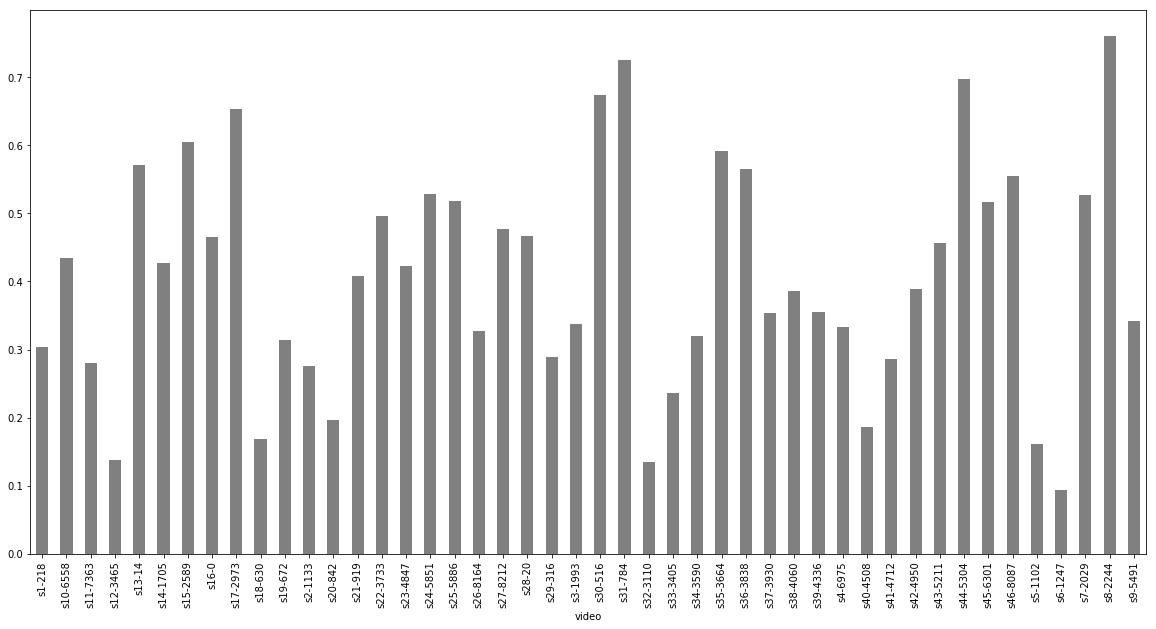

In [55]:
import matplotlib.pyplot as plt
df['seal_pct'].plot(kind='bar', figsize = (20,10), color = 'gray')

In [42]:
df['seal_pct'].mean()

0.40753718191623906

In [121]:
list(labels['video'].unique())

['s1-218',
 's10-6558',
 's11-7363',
 's12-3465',
 's13-14',
 's14-1705',
 's15-2589',
 's16-0',
 's17-2973',
 's18-630',
 's19-672',
 's2-1133',
 's20-842',
 's21-919',
 's22-3733',
 's23-4847',
 's24-5851',
 's25-5886',
 's26-8164',
 's27-8212',
 's28-20',
 's29-316',
 's3-1993',
 's30-516',
 's31-784',
 's32-3110',
 's33-3405',
 's34-3590',
 's35-3664',
 's36-3838',
 's37-3930',
 's38-4060',
 's39-4336',
 's4-6975',
 's40-4508',
 's41-4712',
 's42-4950',
 's43-5211',
 's44-5304',
 's45-6301',
 's46-8087',
 's5-1102',
 's6-1247',
 's7-2029',
 's8-2244',
 's9-5491']

In [92]:
# seals
vids_valid = ['s6-1247','s6-1247','s45-6301','s1-218', 's43-5211']
vids_test = ['s30-516', 's35-3664']

In [140]:
# for vid in list(labels.sort_values('split')['video'].unique()):
#     print(vid, vid_splits[vid])
#     view_video_sample(vid)

## view some frames

In [ ]:
from PIL import Image

In [72]:
def view_video_sample(vid):
    paths = list(labels[labels['video'] == vid]['frame'])
    paths = [path_data + vid + '/' + p for p in paths]

    # plot first
    img = Image.open(paths[0])
    plt.imshow(img)
    plt.show()

    # plot last
    img = Image.open(paths[len(paths)-1])
    plt.imshow(img)
    plt.show()